In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


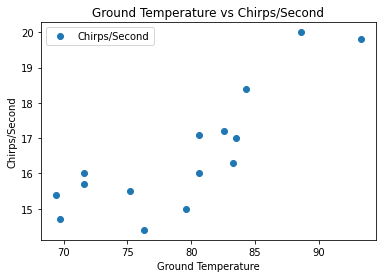

In [4]:
df.plot(x='Ground Temperature', y='Chirps/Second', style = 'o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

**Outlier ****

In [7]:
#IQR = 75% - 25% 

# Chirps/Second:

Q3, Q1 = np.percentile(df['Chirps/Second'], [75,25])

IQR_Chirps = Q3 - Q1

IQR_Chirps = IQR_Chirps.round(2)

Upper_Limit = Q3 + 1.5 * IQR_Chirps
Lower_Limit = Q3 - 1.5 * IQR_Chirps

print('Chirps/Second:')
print('UL :', Upper_Limit.round(2), '\nLL :', Lower_Limit.round(2), '\n')

x = np.where( (df['Chirps/Second'] > Upper_Limit) | (df['Chirps/Second'] < Lower_Limit) )
print('Outlier index:', x)

Chirps/Second:
UL : 19.7 
LL : 14.6 

Outlier index: (array([ 0,  2, 14]),)


In [8]:
# df = df.drop(index = [0,2,14], axis = 0)

# multiindex_df.drop('weight', level=1, axis=0, inplace=True)
# multiindex_df

# df.shape

In [9]:
#IQR = 75% - 25% 

# Ground Temperature

Q3, Q1 = np.percentile(df['Ground Temperature'], [75,25])

IQR_GT = Q3 - Q1

IQR_GT = IQR_GT.round(2)

Upper_Limit = Q3 + 1.5 * IQR_GT
Lower_Limit = Q3 - 1.5 * IQR_GT

print('Ground Temperature:')
print('UL: ', Upper_Limit.round(2), '\nLL: ', Lower_Limit)

Ground Temperature:
UL:  98.4 
LL:  68.4


In [10]:
# df = df.reset_index(drop = True)
# df

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

**Finding Correlation:**

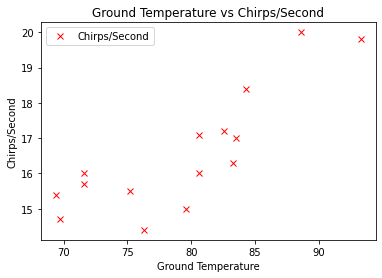

In [11]:
df.plot(x='Ground Temperature', y='Chirps/Second', style = 'rx')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [12]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


**There is a linear relationship between Ground Temperature and Chirps/Second. So, we can apply Linear Regression.**

## **Data Preparation**

In [13]:
X = df.iloc[:, -1].values 
y = df.iloc[:, 0].values # target as arrays

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
X_train, X_test

(array([69.4, 80.6, 84.3, 79.6, 69.7, 76.3, 83.5, 71.6, 82.6, 88.6]),
 array([71.6, 75.2, 80.6, 93.3, 83.3]))

In [15]:
X_train.shape, X_test.shape

((10,), (5,))

In [16]:
X_train.reshape(-1,1)
X_test.reshape(-1,1)
y_train.reshape(-1,1)
y_test.reshape(-1,1)

array([[15.7],
       [15.5],
       [16. ],
       [19.8],
       [16.3]])

## **Modelling**

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [18]:
c = (model.intercept_[0]).round(4) # c

In [19]:
m = (model.coef_[0][0]).round(4) # m

1. **Find the linear regression equation for this data.**

---



y = mx + c


---


y (Target) - Chirps/Second

x (Feature) - Ground Temperature

In [20]:
print('Linear Regression equation, y = {} * x + ({})'.format(m,c))

Linear Regression equation, y = 0.2155 * x + (-0.4199)


2. **Chart the original data and the equation on the chart.**

In [21]:
y_pred_whole = model.predict(X.reshape(-1,1))

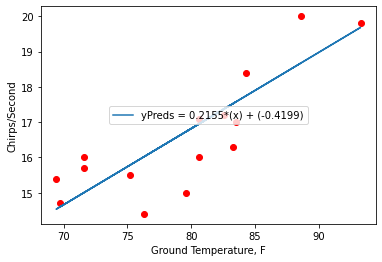

In [22]:
plt.scatter(X, y, color = 'r')
plt.plot(X, y_pred_whole, label = 'yPreds = {}*(x) + ({})'.format(m,c))
plt.xlabel('Ground Temperature, F')
plt.ylabel('Chirps/Second') # predicted whole data includes both test and train
plt.legend(loc = 'center')

3. **Evaluation Metric:**

In [23]:
y_pred = model.predict(X_test.reshape(-1,1))

In [24]:
y_pred

array([[15.00743057],
       [15.7831072 ],
       [16.94662215],
       [19.68303693],
       [17.52837962]])

In [25]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7653252088195535


With **R2 - Score = 0.73,** there is a **good correlation between Ground Temperature (Feature) and Chirpping per Second (Target).**



***Since, R2 < 0.8, the strong correlation couldn't be established.***

4. **Extrapolate:**

In [26]:
# y = mx + c

x = float(input("Enter Ground Temperature: ")) # Ground Temperature

model.intercept_ #c
model.coef_ # m

# c = 6.77, m = 0.12

# Chirps/Second = (0.12 * Ground Temperature) + 6.77

y = model.predict([[x]])

print('At The Ground Temperature', x, 'F, the ground cricket makes', float(y.round(1)), 'Chirps/Second.')

Enter Ground Temperature: 95
At The Ground Temperature 95.0 F, the ground cricket makes 20.0 Chirps/Second.


5. **Interpolate**

In [27]:
y = float(input("Chirps/Second: "))

x = (y - model.intercept_) / model.coef_

print('For the Crickets, to make', y, 'Chirps/Second, the Ground Temperature will be around', float(x.round(1)), 'F.')

Chirps/Second: 15.378
For the Crickets, to make 15.378 Chirps/Second, the Ground Temperature will be around 73.3 F.


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [28]:
df = pd.read_fwf("brain_body.txt")

df.head(7)

,Body(Kg),Brain(g)
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
5,27.660,115.0
6,14.830,98.2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Body(Kg)  62 non-null     float64
 1   Brain(g)  62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


### **Outlier Detection & Elimination**

In [30]:
# IQR_Body

Q3, Q1 = (np.percentile(df['Body(Kg)'], [75,25])).round(2)
print('Q3: ', Q3, 'Q1: ', Q1)

IQR_Body = Q3 - Q1
print('IQR_Body: ', IQR_Body)

UL = (Q3 + 1.5 * IQR_Body).round(2)
LL = (Q1 - 1.5 * IQR_Body).round(2)

print('UL: ', UL, 'LL: ', LL)

Q3:  48.2 Q1:  0.6
IQR_Body:  47.6
UL:  119.6 LL:  -70.8


In [31]:
df.drop(df[df['Body(Kg)'] > UL].index, inplace = True)
df.drop(df[df['Body(Kg)'] < LL].index, inplace = True)

In [32]:
df.shape

(52, 2)

### **Finding Correlation**

In [33]:
X = df.iloc[:, 0].values # Feature
y = df.iloc[:, 1].values # Target

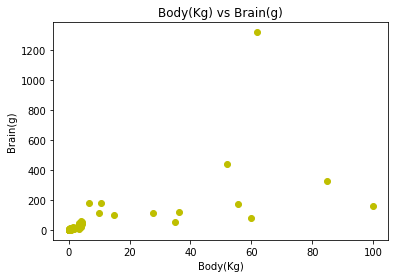

In [34]:
plt.scatter(X, y, color = 'y')
plt.xlabel('Body(Kg)')
plt.ylabel('Brain(g)')
plt.title('Body(Kg) vs Brain(g)')

print()

In [35]:
df.corr()

,Body(Kg),Brain(g)
Body(Kg),1.000000,0.582123
Brain(g),0.582123,1.000000


**Since, the correlation > 0.2, which stands at 0.58, we can train this using Linear Regression model. No transformation required.**

### **Data Preparation**

In [36]:
X = df.iloc[:, 0].values # Feature
y = df.iloc[:, 1].values # Target

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [38]:
X_train, X_test

(array([8.500e+01, 2.500e+00, 3.385e+00, 3.600e+00, 2.300e-02, 6.800e+00,
        7.500e-01, 1.700e+00, 1.000e+02, 1.055e+01, 6.000e+01, 9.000e-01,
        7.850e-01, 2.000e-01, 3.300e+00, 6.200e+01, 2.800e-01, 1.400e+00,
        1.410e+00, 1.350e+00, 6.000e-02, 3.500e+01, 2.000e+00, 4.800e-02,
        4.250e-01, 1.620e+00, 3.633e+01, 4.800e-01, 5.000e-03, 1.010e-01,
        2.300e-02, 3.500e+00, 1.000e+00]),
 array([3.000e+00, 1.000e+01, 1.200e-01, 1.040e-01, 1.220e-01, 4.288e+00,
        5.500e-01, 4.235e+00, 1.040e+00, 2.766e+01, 1.483e+01, 5.550e+01,
        4.050e+00, 7.500e-02, 3.500e+00, 5.216e+01, 1.000e-02, 9.200e-01,
        4.190e+00]))

In [39]:
X_train.shape

(33,)

In [40]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

X_train.shape

(33, 1)

### **Modeling**

In [41]:
from sklearn.linear_model import LinearRegression

linModel = LinearRegression() # Instantiation

linModel.fit(X_train, y_train)

LinearRegression()

In [42]:
m = (linModel.coef_[0][0]).round(4) # m

In [43]:
c = (linModel.intercept_[0]).round(4) # c

### Tasks

1. **Find the linear regression equation for this data.**

---



**y = mx + c**


---


y (Target) - Brain(g)

x (Feature) - Body(Kg)


In [44]:
print('Linear Regression equation, y = {}* x + ({})'.format(m, c))

Linear Regression equation, y = 4.8175* x + (18.1031)


2. **Chart the original data and the equation on the chart.**

In [45]:
y_pred_whole = (linModel.predict(X.reshape(-1,1))).round(1)

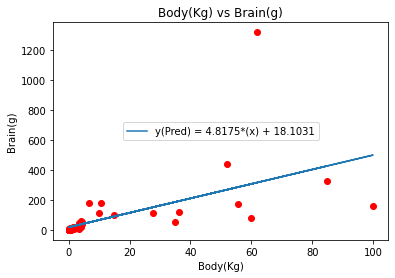

In [46]:
plt.scatter(X, y, color = 'r')
plt.plot(X, linModel.predict(X.reshape(-1,1)), label = 'y(Pred) = {}*(x) + {}'.format(m,c))
plt.xlabel('Body(Kg)')
plt.ylabel('Brain(g)')
plt.title('Body(Kg) vs Brain(g)')
plt.legend(loc = 'center')
plt.show()

3. **Evaluation Metrics**

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
print('R2-Score: ', metrics.r2_score(y_test, y_pred))

R2-Score:  -0.2826448201308107


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [49]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [108]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [181]:
#df.corr()
df.corr().style.background_gradient(cmap ='RdGy')

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


### **Find the linear regression equation for this data using columns 1-5 to column 6.**

In [200]:
X = df.iloc[:, :-1].values # Features
y = df.loc[:, 'Salary'].values # Target

In [201]:
X.shape, y.shape

((52, 5), (52,))

In [202]:
y = y.reshape(-1,1)
y.shape

(52, 1)

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [216]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

m = reg.coef_[0].round(2)
c = reg.intercept_[0].round(2)

m,c

(array([ 1487.81,  6007.16,   486.72, -1630.8 ,  -168.25]), 11503.49)

In [217]:
print('Linear Regression equation, y = ({[0]}*X1) + ({[1]}*X2) + ({[2]}*X3) + ({[3]}*X4) + ({[4]}*X5) + {}'.format(m,m,m,m,m,c))

Linear Regression equation, y = (1487.81*X1) + (6007.16*X2) + (486.72*X3) + (-1630.8*X4) + (-168.25*X5) + 11503.49


In [218]:
y_pred = reg.predict(X_test)

In [220]:
from sklearn.metrics import r2_score
print('R2-Score: ', metrics.r2_score(y_test, y_pred, multioutput='variance_weighted').round(4))

R2-Score:  0.9053


### **Find the selection of columns with the best $R^2$ score.**

In [221]:
from itertools import combinations

comb_list = []

df_features = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

for i in range(1, len(df_features) +1):
  comb_list += list(combinations(df_features, i))
  #comb_list += list(itertools.combinations(df_features, i)) ---> just, import itertools

In [222]:
result = []

for n in comb_list:
  X = df[list(n)]
  y = df.iloc[:, -1]

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  from sklearn.linear_model import LinearRegression
  reg = LinearRegression().fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  from sklearn.metrics import r2_score
  print('For Features:', n)
  R2_Score = metrics.r2_score(y_test, y_pred, multioutput='variance_weighted').round(4)
  print('R2-Score: ', R2_Score, '\n')

  result.append({'Features' : n, 'R2-Score': R2_Score})

  score = pd.DataFrame(result, columns = ['Features', 'R2-Score'])

For Features: ('Sex',)
R2-Score:  0.0481 

For Features: ('Rank',)
R2-Score:  0.7954 

For Features: ('Year',)
R2-Score:  0.4279 

For Features: ('Degree',)
R2-Score:  -0.2007 

For Features: ('YSdeg',)
R2-Score:  -0.4817 

For Features: ('Sex', 'Rank')
R2-Score:  0.7949 

For Features: ('Sex', 'Year')
R2-Score:  0.2166 

For Features: ('Sex', 'Degree')
R2-Score:  0.2003 

For Features: ('Sex', 'YSdeg')
R2-Score:  0.2128 

For Features: ('Rank', 'Year')
R2-Score:  0.8004 

For Features: ('Rank', 'Degree')
R2-Score:  0.7946 

For Features: ('Rank', 'YSdeg')
R2-Score:  0.7673 

For Features: ('Year', 'Degree')
R2-Score:  0.304 

For Features: ('Year', 'YSdeg')
R2-Score:  0.2417 

For Features: ('Degree', 'YSdeg')
R2-Score:  0.5912 

For Features: ('Sex', 'Rank', 'Year')
R2-Score:  0.8943 

For Features: ('Sex', 'Rank', 'Degree')
R2-Score:  0.5503 

For Features: ('Sex', 'Rank', 'YSdeg')
R2-Score:  0.8983 

For Features: ('Sex', 'Year', 'Degree')
R2-Score:  0.3287 

For Features: ('Sex', 

In [223]:
score = score.sort_values(by = 'R2-Score', ascending = False)
score.head()

,Features,R2-Score
29,"(Rank, Year, Degree, YSdeg)",0.9395
17,"(Sex, Rank, YSdeg)",0.8983
15,"(Sex, Rank, Year)",0.8943
22,"(Rank, Year, YSdeg)",0.8152
9,"(Rank, Year)",0.8004


In [224]:
score.tail(5)

,Features,R2-Score
0,"(Sex,)",0.0481
20,"(Sex, Degree, YSdeg)",0.0308
19,"(Sex, Year, YSdeg)",-0.0127
3,"(Degree,)",-0.2007
4,"(YSdeg,)",-0.4817


In [225]:
best_feature = score.iloc[:1, :1].values[0][0]
best_R2Score = score.iloc[:1, 1:].values[0][0]

print('Among the combinations, {} feature combination provides the best R2-Score {}.'.format(best_feature, best_R2Score))

Among the combinations, ('Rank', 'Year', 'Degree', 'YSdeg') feature combination provides the best R2-Score 0.9395.
